In [1]:
import pandas as pd
import numpy as np

# Defining the Trainset and Test

In [2]:
colnames = ["Age","Workclass","Fnlwgt","Education","Education_num","Marital_status","Occupation","Relationship","Race","Sex","Capital_gain","Capital_loss","Hours_per_week","Native_country","Income"]
train = pd.read_csv("adult.csv",names=colnames,header=None)
test = pd.read_csv("adult_test.csv",names=colnames,header=None)

# Information of the data in the dataframe for both trainset and testset

In [3]:
print(train.describe())
print(test.describe())

                Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
                Age        Fnlwgt  Education_num  Capital_gain 

# Replacing all the "?" values in the data with np.nan so as to perform imputation on them later

In [4]:
train = train.replace(" ?",np.nan)
test = test.replace(" ?",np.nan)

# Spliting the Trainset and Testset to it's respective x_train, y_train, x_test & y_test

In [5]:
'''
split_x_y function has been defined to split the train and test data sets into separate x_train,y_train,x_test and y_test
to pass them into the ML algorithms later
data: Dataframe where last column is the label
'''
def split_x_y(data):
    x = data.iloc[:,:-1].values
    y = data.iloc[:,-1].values    
    return x,y

In [6]:
x_train, y_train = split_x_y(train)
x_test, y_test = split_x_y(test)

# Using the sklearn SimpleImputer function to fill in the missing values, another such imputer function is Datawig

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
'''
imput_missing_values function is defined to fill the missing values in both, the train set and test set provided
x: parameter which take a dataframe with only indepented varialble and not the label
'''
def imput_missing_values(x):
    imputer.fit(x[:,1:])
    x[:,1:] = imputer.transform(x[:,1:])
    return x

In [9]:
x_train = imput_missing_values(x_train)
x_test = imput_missing_values(x_test)

# Need to perform label encoder in order to convert the string values into numerical representation for the ML algorithm to understand

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
col1 = LabelEncoder()
col2 = LabelEncoder()
col3 = LabelEncoder()
col4 = LabelEncoder()
col5 = LabelEncoder()
col6 = LabelEncoder()
col7 = LabelEncoder()
col8 = LabelEncoder()
output = LabelEncoder()

'''
label_encoding function has been defined to perform encoding on both the train and test sets
'''
def label_encoding(x,y):
    x[:,1] = col1.fit_transform(x[:,1])
    x[:,3] = col1.fit_transform(x[:,3])
    x[:,5] = col1.fit_transform(x[:,5])
    x[:,6] = col1.fit_transform(x[:,6])
    x[:,7] = col1.fit_transform(x[:,7])
    x[:,8] = col1.fit_transform(x[:,8])
    x[:,9] = col1.fit_transform(x[:,9])
    x[:,13] = col1.fit_transform(x[:,13])
    y = output.fit_transform(y)
    
    return x,y

In [12]:
x_train, y_train = label_encoding(x_train,y_train)
x_test, y_test = label_encoding(x_test,y_test)

# Normalize data before sending it to ml models

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Executing XGBoost and Logistic Regression models to see the performance

In [14]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
xgboost=XGBClassifier()
xgboost.fit(x_train,y_train)
print("xgboost classification score",xgboost.score(x_train,y_train))

C:\Users\ey383aw\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost classification score 0.9045483861060778


In [16]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
print("Lr classification score",lr.score(x_train,y_train))

Lr classification score 0.824513989128098


In [17]:
xgboost_ypred = xgboost.predict(x_test)
lr_ypred = lr.predict(x_test)

# Assessing the model predictions with the truth values

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
conf_matrix = confusion_matrix(y_test,xgboost_ypred)
print("confusion matrix for xgboost_model",'\n',conf_matrix)

conf_matrix = confusion_matrix(y_test,lr_ypred)
print("confusion matrix for liner regression model",'\n',conf_matrix)

confusion matrix for xgboost_model 
 [[11631   804]
 [ 1443  2403]]
confusion matrix for liner regression model 
 [[11709   726]
 [ 2115  1731]]


In [20]:
xgboost_report = classification_report(y_test,xgboost_ypred)
print(" xgboost classification_report" ,'\n',xgboost_report)

lr_report = classification_report(y_test,lr_ypred)
print(" lr classification_report" ,'\n',lr_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     12435
           1       0.75      0.62      0.68      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.78      0.80     16281
weighted avg       0.86      0.86      0.86     16281

 lr classification_report 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     12435
           1       0.70      0.45      0.55      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.70      0.72     16281
weighted avg       0.81      0.83      0.81     16281



In [21]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

In [22]:
print(roc_auc_score(y_test,xgboost_ypred))
print(roc_auc_score(y_test,lr_ypred))

0.7800743899478536
0.6958472042138621


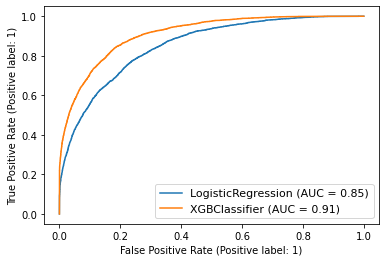

In [23]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(xgboost,x_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')